### 1.复习上课内容。

### 2.理论题

1. Why we need $\gamma$ in reinforcement learning ?

Ans: To avoid the infinite circulation in some states and infinite rewards, we add a $\gamma$ range from 0 and 1 to adjust value.

2. Please breifly explain what is value function and what is Q function ?

Ans: In reinforcement learning, there are usually some actions with probabilities in some state, the value function is to compute the expected rewards in a given state, while the Q function is to calculate the expected rewards with an action.

3. How temperal difference related to dynamic programming and monte-carlo methods ?

Ans: Temporal-Difference (TD) is a method trying to combine dynamic programming and monte-carlo methods. It randomly gets some states, which is similar to monte-carlo, then using dynamic programming to generate following states. Thus, TD is a method which not only need much less computing than monte-carlo, but need no more probability transition.

4. Please briefly describe what are value iteration and policy iteration ?

Ans: Value iteration and policy iteration are two methods in dynamic programming for RL. Value iteration randomly generates primary values firstly, then using bellman equation to compute until convergence. Policy iteration is to initialize policy for each state, then get corresponding values and Q-values after policy evaluation, then further improve policy based on values. Repeat these steps until convergence.

5. How can we use deep lerning in reinforcement learning ?

Ans: We can use DL to perform supervised learning after extracting features to predict Q-values; Also, we can do policy gradient, which is based on DL, to get the best policy.

### 选做题 （实践）

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

In [10]:
def draw_image(image):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax,bbox=[0,0,1,1])

    nrows,ncols = image.shape
    width,height = 1.0/ncols,1.0/nrows

    for (i,j), val in np.ndenumerate(image):
        if (i,j) == (0,1):
            val = "A"
        elif (i,j) == (0,3):
            val = "B"
        elif (i,j) == (4,1):
            val = "A'"
        elif (i,j) == (2,3):
            val = "B'"
        tb.add_cell(i,j,width,height,text=val,
                    loc='center',facecolor='white')

    for i in range(len(image)):
        tb.add_cell(i,-1,width,height,text=i+1,loc='right',
                    edgecolor='none',facecolor='none')
        tb.add_cell(-1,i,width,height/2,text=i+1,loc='center',
                    edgecolor='none',facecolor='none')
    ax.add_table(tb)

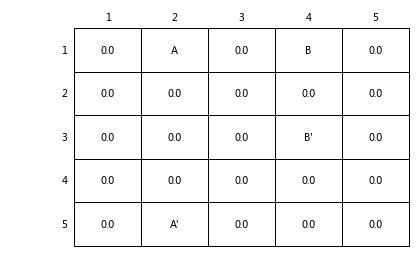

In [12]:
WORLD_SIZE=5
draw_image(np.zeros((WORLD_SIZE,WORLD_SIZE)))

Figure above shows a rectangular gridworld. The cell of the grid correspond to the state of the environment. At each cell, four actions with equal probability are possible: north, south, east and west, which deterministically cause the agent to move one cell in the respective direction on the grid. Actions that would take the agent off the grid leave its unchanged, but also result in a reward -1. Other actions result in a reward of 0, expect those taht move the agent out of the special states A and B. From state A, all four actions yield a reward of +10 and take the agent to A'. From state B, all actions yield a reward of +5 and take the agent to B'. 

#### Try to compute the value of each state ? You can choose any algorithms we leanred in the class.
Good luck and happy new year. !!

In [1]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table 

In [2]:
A_pos = [0, 1]
A_prime_pos = [4, 1]
B_pos = [0, 3]
B_prime_pos = [2, 3]
rate = 0.9
WORD_SIZE = 5
ACTIONS = [np.array([0, -1]), np.array([-1, 0]), np.array([0, 1]), np.array([1, 0])] # down, left, right, up

ACTION_prob = 0.25

In [3]:
def move(state, action):
    if state == A_pos:
        return A_prime_pos, 10
    if state == B_pos:
        return B_prime_pos, 5
    
    next_state = (np.array(state)+action).tolist()
    x, y = next_state
    
    if x < 0 or x >= WORD_SIZE or y < 0 or y >= WORD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0
    return next_state, reward

In [4]:
def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox = [0, 0, 1, 1])
    
    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows 
    
    for (i, j), val in np.ndenumerate(image):
        tb.add_cell(i, j, width, height, text = val, loc = 'center', facecolor = 'white')
        
    for i in range(len(image)):
        tb.add_cell(i, -1, width, height, text = i + 1, loc = 'right', edgecolor = 'none', facecolor = 'none')
        tb.add_cell(-1, i, width, height / 2, text = i + 1, loc = 'center', edgecolor = 'none', facecolor = 'none')
        
    ax.add_table(tb)

In [5]:
def get_results():
    value = np.zeros((WORD_SIZE, WORD_SIZE))
    while True:
        new_value = np.zeros_like(value)
        for i in range(WORD_SIZE):
            for j in range(WORD_SIZE):
                for action in ACTIONS:
                    (next_i, next_j), reward = move([i, j], action)
#                     print()
                    new_value[i, j] += ACTION_prob * (reward + rate * value[next_i, next_j])
                    
        if np.sum(np.abs(value - new_value)) < 1e-5: # convergence 
            draw_image(np.round(new_value, decimals = 3))
            plt.show()
            break
        
        value = new_value 

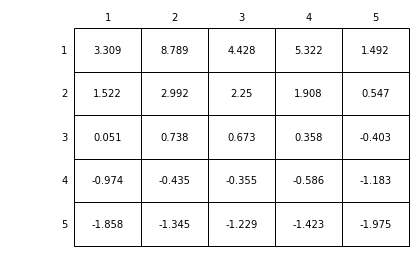

In [6]:
get_results()